In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [136]:
df = pd.read_csv('data_science.csv', encoding='latin-1')
df.head()

,Title,Author,Notes,Checkouts,Call Number,No of Copies,Status(Available),Date Due(Months)
0,Advanced Engineering Mathematics,"Kreyszig, Erwin",MAT,412,517 KRE,30,27,2
1,Engineering electromagnetics,Hayt William H,PHY,360,538.56 HAY,30,10,2
2,C how to program,Deitel Paul,CSE,323,004.43C DEI,21,5,1
3,Fundamentals of Electric Circuits,Alexander Charles K,ECE,310,621.3.049 ALE,20,3,1
4,Schaum's outlines programming with C,"Gottfried, Byron S",CSE,295,004.43C GOT,16,4,2


In [137]:
df.columns

Index(['Title', 'Author', 'Notes', 'Checkouts', 'Call Number', 'No of Copies',
       'Status(Available)', 'Date Due(Months)'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              99 non-null     object
 1   Author             99 non-null     object
 2   Notes              88 non-null     object
 3   Checkouts          99 non-null     int64 
 4   Call Number        99 non-null     object
 5   No of Copies       99 non-null     int64 
 6   Status(Available)  99 non-null     int64 
 7   Date Due(Months)   99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


# Steps in Data Analysis
1. Missing Values
2. Explore about the numerical variables
3. Explore about categorical variables
4. Finding Relationship between features

In [139]:
df.isnull().sum()

Title                 0
Author                0
Notes                11
Checkouts             0
Call Number           0
No of Copies          0
Status(Available)     0
Date Due(Months)      0
dtype: int64

In [140]:
df.dropna(inplace = True)
df.head()

,Title,Author,Notes,Checkouts,Call Number,No of Copies,Status(Available),Date Due(Months)
0,Advanced Engineering Mathematics,"Kreyszig, Erwin",MAT,412,517 KRE,30,27,2
1,Engineering electromagnetics,Hayt William H,PHY,360,538.56 HAY,30,10,2
2,C how to program,Deitel Paul,CSE,323,004.43C DEI,21,5,1
3,Fundamentals of Electric Circuits,Alexander Charles K,ECE,310,621.3.049 ALE,20,3,1
4,Schaum's outlines programming with C,"Gottfried, Byron S",CSE,295,004.43C GOT,16,4,2


In [141]:
df.isnull().sum()

Title                0
Author               0
Notes                0
Checkouts            0
Call Number          0
No of Copies         0
Status(Available)    0
Date Due(Months)     0
dtype: int64

In [142]:
df.columns

Index(['Title', 'Author', 'Notes', 'Checkouts', 'Call Number', 'No of Copies',
       'Status(Available)', 'Date Due(Months)'],
      dtype='object')

In [143]:
df.drop_duplicates( inplace = True )
df.head()

,Title,Author,Notes,Checkouts,Call Number,No of Copies,Status(Available),Date Due(Months)
0,Advanced Engineering Mathematics,"Kreyszig, Erwin",MAT,412,517 KRE,30,27,2
1,Engineering electromagnetics,Hayt William H,PHY,360,538.56 HAY,30,10,2
2,C how to program,Deitel Paul,CSE,323,004.43C DEI,21,5,1
3,Fundamentals of Electric Circuits,Alexander Charles K,ECE,310,621.3.049 ALE,20,3,1
4,Schaum's outlines programming with C,"Gottfried, Byron S",CSE,295,004.43C GOT,16,4,2


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 98
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              88 non-null     object
 1   Author             88 non-null     object
 2   Notes              88 non-null     object
 3   Checkouts          88 non-null     int64 
 4   Call Number        88 non-null     object
 5   No of Copies       88 non-null     int64 
 6   Status(Available)  88 non-null     int64 
 7   Date Due(Months)   88 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.2+ KB


In [145]:
df.describe()

,Checkouts,No of Copies,Status(Available),Date Due(Months)
count,88.000000,88.000000,88.000000,88.000000
mean,137.840909,11.329545,7.102273,1.545455
std,70.816565,5.347083,5.479407,0.500783
min,6.000000,1.000000,0.000000,1.000000
25%,102.250000,7.000000,2.000000,1.000000
50%,122.000000,10.000000,7.000000,2.000000
75%,158.500000,15.000000,11.000000,2.000000
max,412.000000,30.000000,27.000000,2.000000


In [146]:
df.Notes.value_counts()

CSE     24
MAT     18
ECE     17
MECH    17
PHY      7
GEN      5
Name: Notes, dtype: int64

# Top 10 Books By category

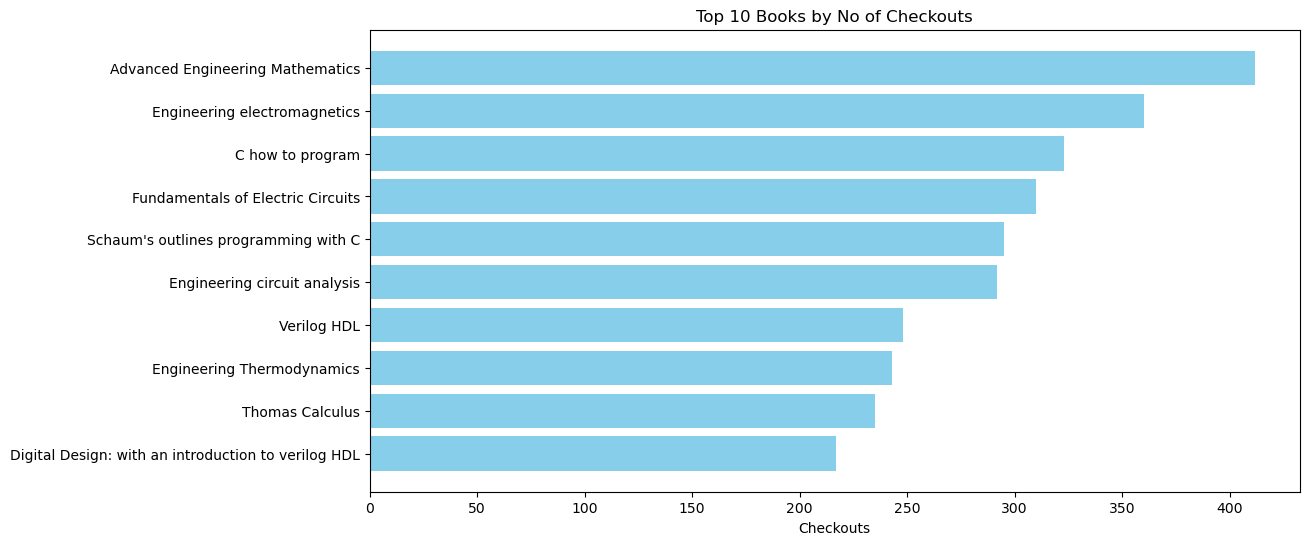

In [147]:
top_10_books = df.sort_values(by='Checkouts', ascending=False).head(10)

#bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_10_books['Title'], top_10_books['Checkouts'], color='skyblue')
plt.xlabel('Checkouts')
plt.title('Top 10 Books by No of Checkouts')
plt.gca().invert_yaxis()
plt.show()


In [148]:
dept_names = df.Notes.value_counts().index
no_of_notes = df.Notes.value_counts().values

([<matplotlib.patches.Wedge at 0x27c40993fd0>,
 [Text(0.7203467861122989, 0.8313245501834299, 'CSE'),
  Text(-0.7778174957174646, 0.7778174228929385, 'MAT'),
  Text(-0.983647784272998, -0.4923789561860071, 'ECE'),
  Text(0.11758462441259351, -1.0936973329499116, 'MECH'),
  Text(0.9035628339434295, -0.6273549275458977, 'PHY'),
  Text(1.0825223191592184, -0.19530854697669353, 'GEN')],
 [Text(0.3929164287885266, 0.45344975464550713, '27.27%'),
  Text(-0.42426408857316245, 0.4242640488506937, '20.45%'),
  Text(-0.5365351550579989, -0.268570339737822, '19.32%'),
  Text(0.06413706786141464, -0.5965621816090426, '19.32%'),
  Text(0.4928524548782342, -0.3421935968432169, '7.95%'),
  Text(0.5904667195413918, -0.1065319347145601, '5.68%')])

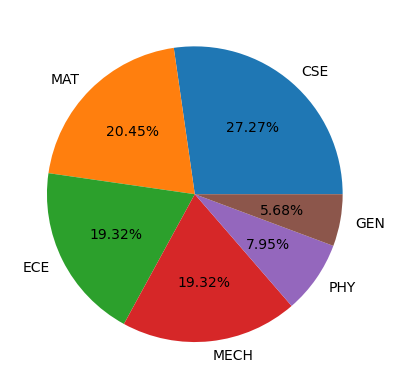

In [149]:
##Pie Chart

plt.pie(no_of_notes, labels = dept_names, autopct='%1.2f%%')

In [150]:
df.groupby(['Checkouts', 'Title']).size()

Checkouts  Title                                               
6          Atomic Habits                                           1
           Ikigai: The Japanese secret to a long and happy life    1
7          Steve Jobs                                              1
8          Optimization for Machine Learning                       1
14         Sapiens: A brief History of Humankind                   1
                                                                  ..
295        Schaum's outlines programming with C                    1
310        Fundamentals of Electric Circuits                       1
323        C how to program                                        1
360        Engineering electromagnetics                            1
412        Advanced Engineering Mathematics                        1
Length: 88, dtype: int64

# Visualization

C:\Users\pavan\AppData\Local\Temp\ipykernel_12260\2487063002.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


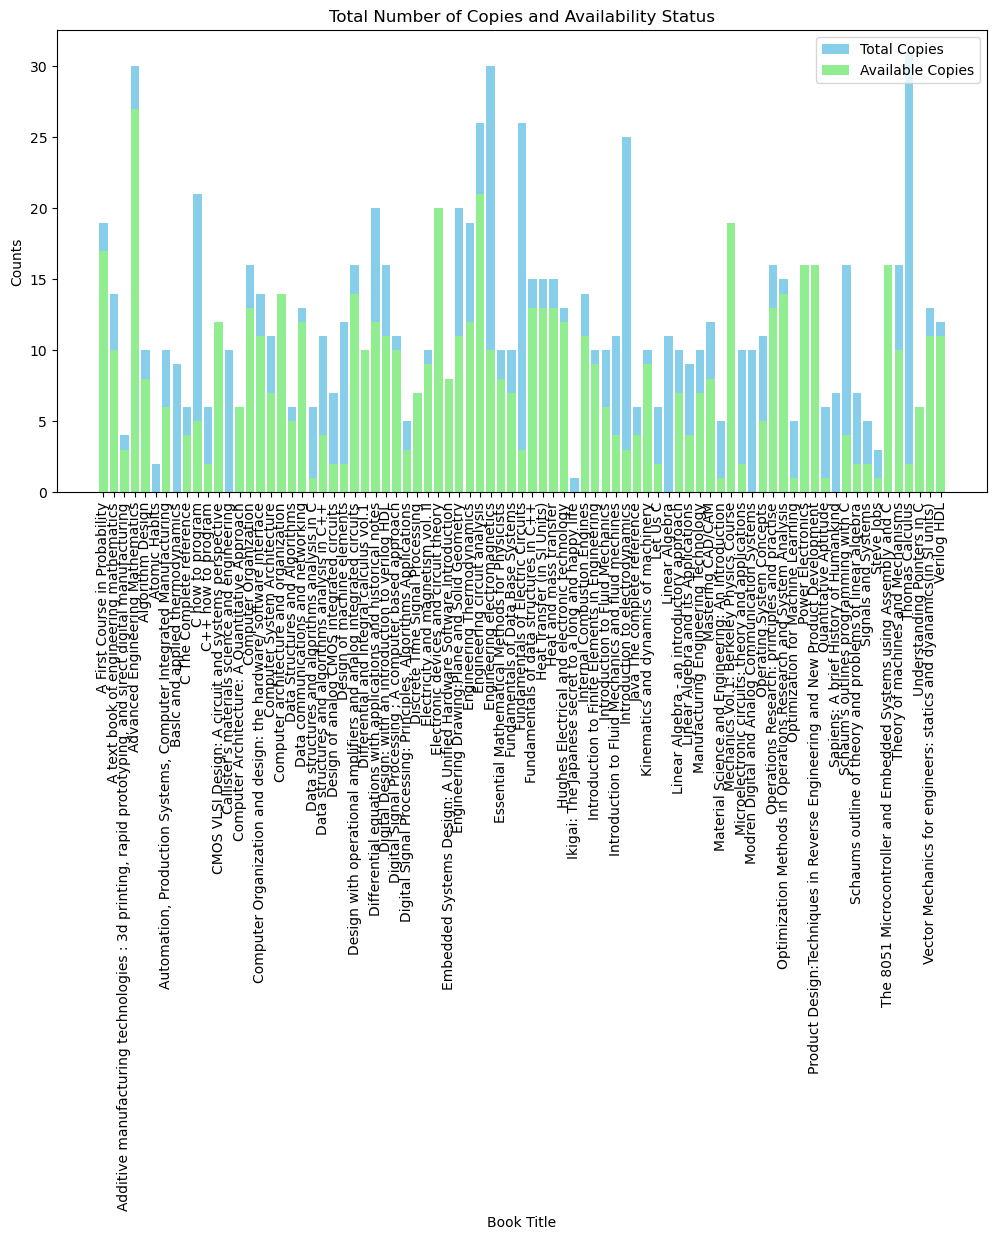

In [151]:
grouped_data = df.groupby('Title').agg({'No of Copies': 'sum', 'Status(Available)': 'sum'}).reset_index()

#bar plot
plt.figure(figsize=(12, 6))

# Plot total number of copies in blue
plt.bar(grouped_data['Title'], grouped_data['No of Copies'], color='skyblue', label='Total Copies')

# Plot the number of available copies in green
plt.bar(grouped_data['Title'], grouped_data['Status(Available)'], color='lightgreen', label='Available Copies')

plt.xlabel('Book Title')
plt.ylabel('Counts')
plt.title('Total Number of Copies and Availability Status')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


In [152]:
#total number of copies and the availability status of the top 10 books based on checkouts

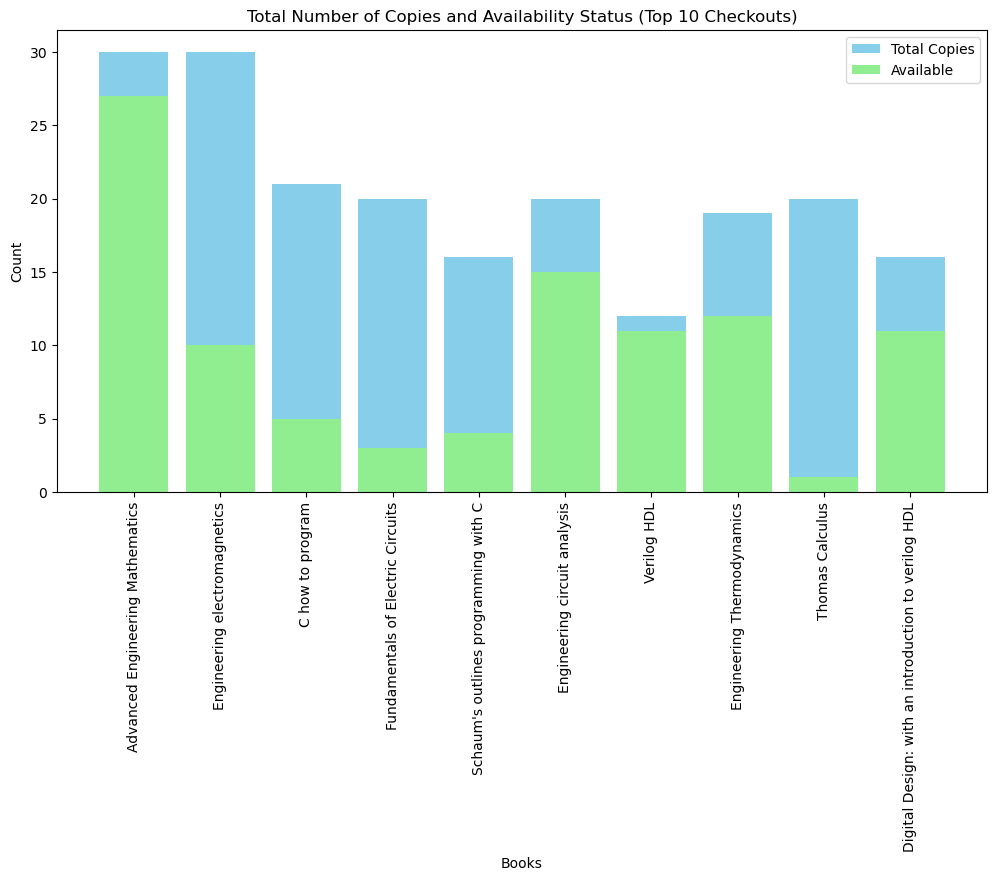

In [153]:
top_10_books = df.sort_values(by='Checkouts', ascending=False).head(10)

#bar graph
plt.figure(figsize=(12, 6))

plt.bar(top_10_books['Title'], top_10_books['No of Copies'], color='skyblue', label='Total Copies')

plt.bar(top_10_books['Title'], top_10_books['Status(Available)'], color='lightgreen', label='Available')

plt.xlabel('Books')
plt.ylabel('Count')
plt.title('Total Number of Copies and Availability Status (Top 10 Checkouts)')
plt.xticks(rotation=90) 
plt.legend()
plt.show()


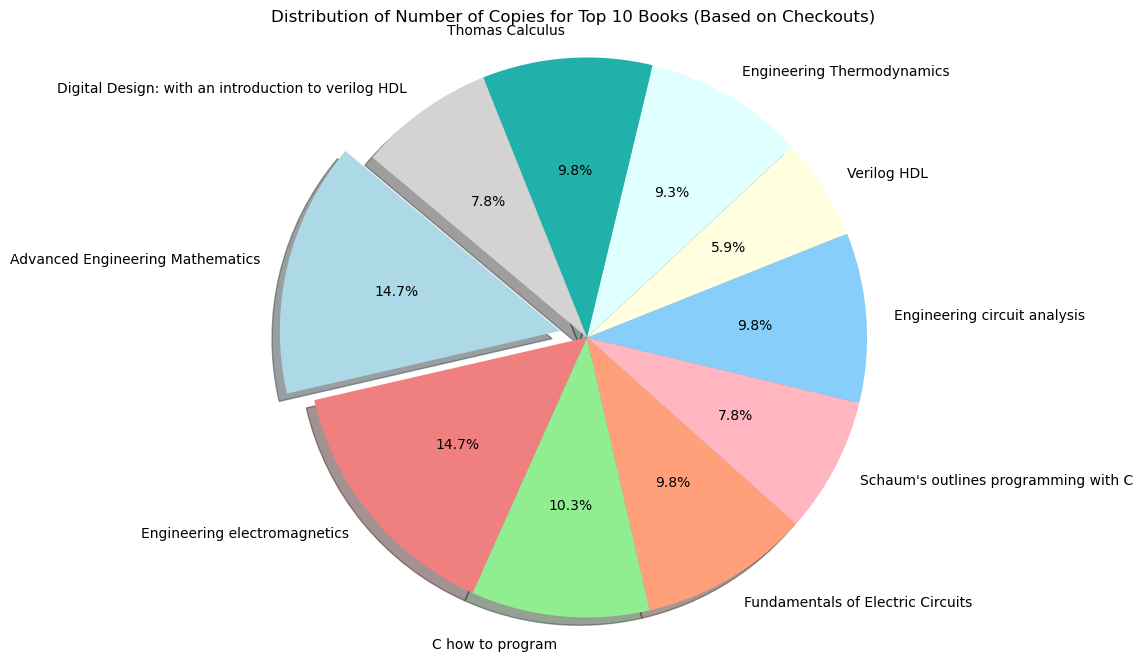

In [154]:

# Sort the DataFrame by Checkouts in descending order and select the top 10 books
top_10_books = df.sort_values(by='Checkouts', ascending=False).head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))

# Labels for the pie chart (book titles)
labels = top_10_books['Title']

# Values for the pie chart (number of copies)
sizes = top_10_books['No of Copies']

# Explode a slice if needed (e.g., to emphasize a specific book)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Colors for each slice
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightpink', 'lightskyblue', 'lightyellow', 'lightcyan', 'lightseagreen', 'lightgray']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.title('Distribution of Number of Copies for Top 10 Books (Based on Checkouts)')
plt.show()



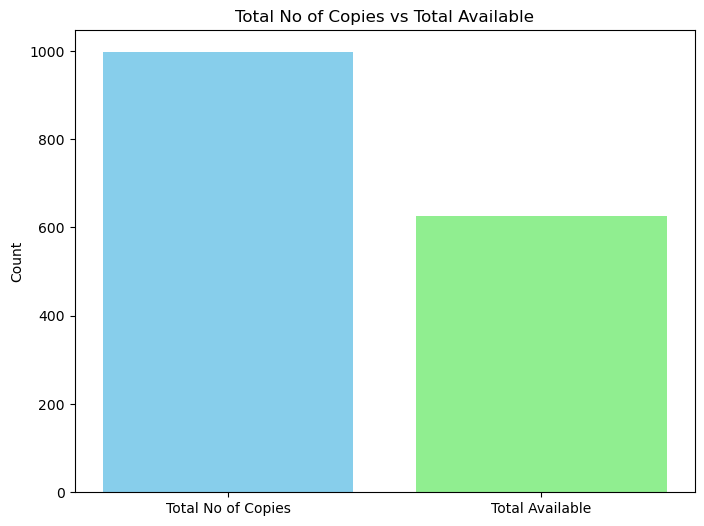

In [155]:

# Calculate the total sum of "No of Copies" and "Status(Available)"
total_copies = df['No of Copies'].sum()
total_available = df['Status(Available)'].sum()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Total No of Copies', 'Total Available'], [total_copies, total_available], color=['skyblue', 'lightgreen'])
plt.ylabel('Count')
plt.title('Total No of Copies vs Total Available')
plt.show()


In [156]:
#Availble books == 0 or 1


available_0_or_1_titles = df[df['Status(Available)'].isin([0, 1])]['Title']
print(available_0_or_1_titles)


8                                       Thomas Calculus
28                                      Thomas Calculus
35                      Introduction to electrodynamics
36        Callister's materials science and engineering
44         Data structures and algorithms analysis in C
54                                Quantitative Aptitude
66                                       Linear Algebra
81                    Fundamentals of Electric Circuits
84    Material Science and Engineering: An Introduction
91                     Basic and applied thermodynamics
93      Modren Digital and Analog Communication Systems
94                Sapiens: A brief History of Humankind
95                    Optimization for Machine Learning
96                                           Steve Jobs
97                                        Atomic Habits
98    Ikigai: The Japanese secret to a long and happ...
Name: Title, dtype: object


Text(0.5, 1.0, 'Distribution of Checkouts by Availability Status')

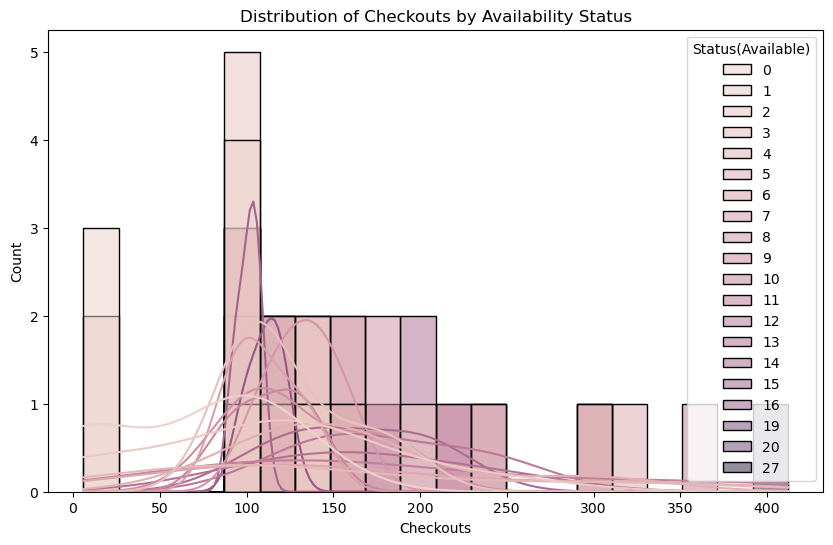

In [157]:
#Distribution Comparison:


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Checkouts', hue='Status(Available)', bins=20, kde=True)
plt.title('Distribution of Checkouts by Availability Status')


In [158]:
# DataFrame where "Status(Available)" is equal to "No of Copies"

matching_books = df[df['Status(Available)'] == df['No of Copies']]

for index, row in matching_books.iterrows():
    print(f"Title: {row['Title']}, Number: {row['No of Copies']}")


Title: CMOS VLSI Design: A circuit and systems perspective, Number: 12
Title: Differential and Integral calculus vol.1, Number: 10
Title: Mechanics Vol.1: Berkeley Physics Course, Number: 19
Title: Discrete Time Signal Processing, Number: 7
Title: Understanding Pointers in C, Number: 6
Title: Embedded Systems Design: A Unified Hardware Software Introduction, Number: 8
Title: The 8051 Microcontroller and Embedded Systems using Assembly and C, Number: 16
Title: Electronic devices and circuit theory, Number: 20
Title: Product Design:Techniques in Reverse Engineering and New Product Development, Number: 16
Title: Computer Architecture: A Quantitative Approach, Number: 6
Title: A First Course in Probability, Number: 9
Title: Power Electronics, Number: 16
Title: Engineering circuit analysis, Number: 6
Title: Computer architecture and organization, Number: 14


In [159]:
#Bar Plots for Categorical Data:

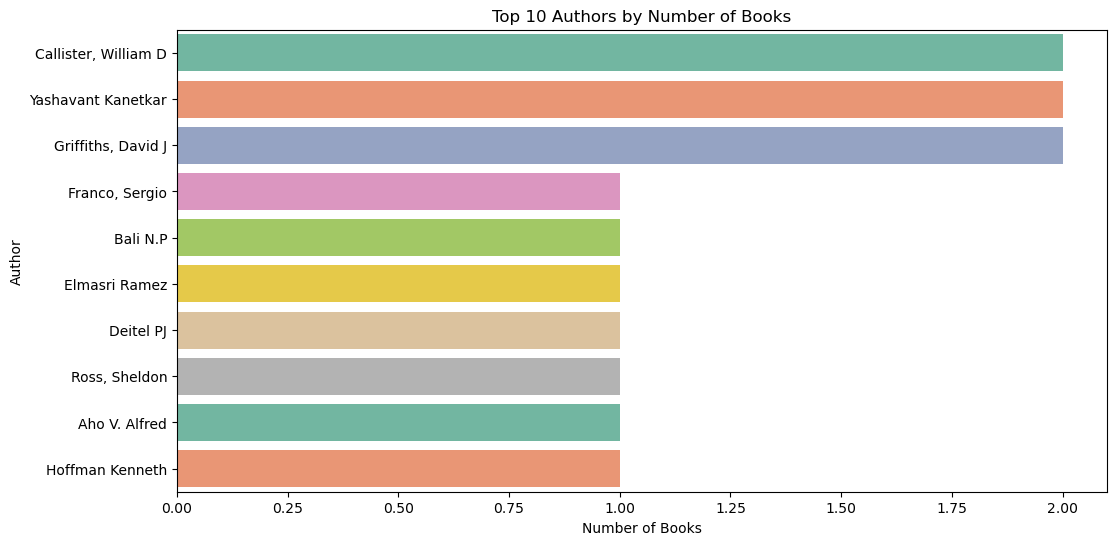

In [160]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Author', data=df, order=df['Author'].value_counts().index[:10], palette='Set2')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.title('Top 10 Authors by Number of Books')
plt.show()


# Predective Analysis

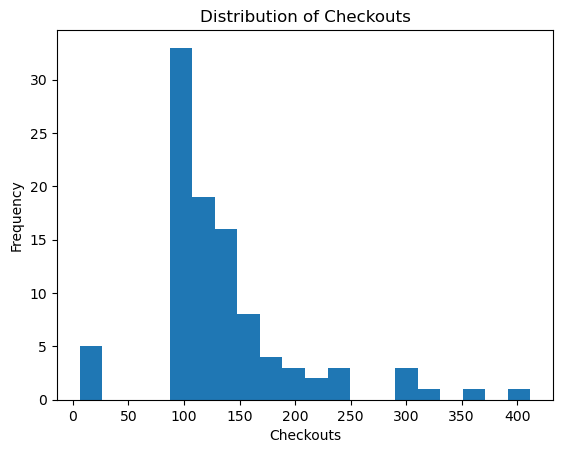

In [197]:

plt.hist(df['Checkouts'], bins=20)
plt.xlabel('Checkouts')
plt.ylabel('Frequency')
plt.title('Distribution of Checkouts')
plt.show()


In [198]:
# Handle missing values
df['Notes'].fillna('Unknown', inplace=True)


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('data_science.csv', encoding='latin-1')

X = df[['No of Copies']]  
# Target variable
y = df['Checkouts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")



Mean Squared Error: 2673.9901037399177
R-squared (R2) Score: 0.6514175256888352


# Predicting a Random data.

In [210]:
import numpy as np

# Generate a random data point for 'No of copies'
random_no_of_copies = np.random.randint(1, 10)  # You can adjust the range as needed

# Use the trained model to make a prediction
predicted_checkouts = model.predict([[random_no_of_copies]])

print(f'Random No of Copies: {random_no_of_copies}')
print(f'Predicted Checkouts: {predicted_checkouts[0]}')


Random No of Copies: 3
Predicted Checkouts: 61.6197676269298


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


       Checkouts  No of Copies
count   99.00000     99.000000
mean   136.00000     11.101010
std     67.49331      5.189265
min      6.00000      1.000000
25%    102.50000      7.000000
50%    120.00000     10.000000
75%    153.00000     14.000000
max    412.00000     30.000000


C:\Users\pavan\AppData\Local\Temp\ipykernel_12260\3966977183.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


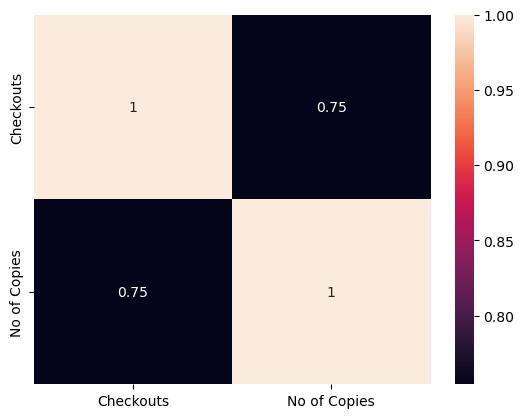

In [186]:
# Summary statistics
print(df.describe())

# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [ ]:
#Box Plots

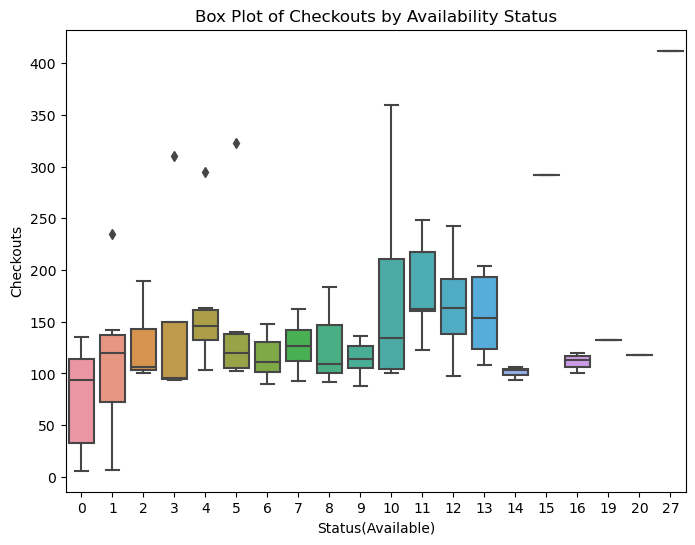

In [167]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status(Available)', y='Checkouts', data=df)
plt.xlabel('Status(Available)')
plt.ylabel('Checkouts')
plt.title('Box Plot of Checkouts by Availability Status')
plt.show()


In [ ]:
#Pair Plots (Scatter Matrix):

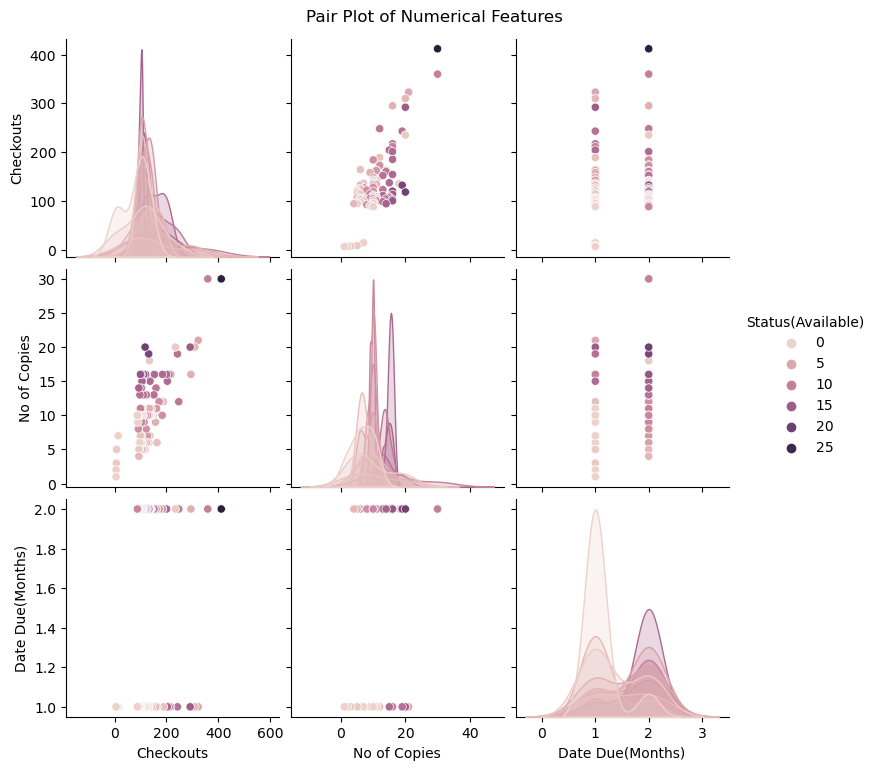

In [211]:
sns.pairplot(df, hue='Status(Available)', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


In [ ]:
#Time Series Plots:

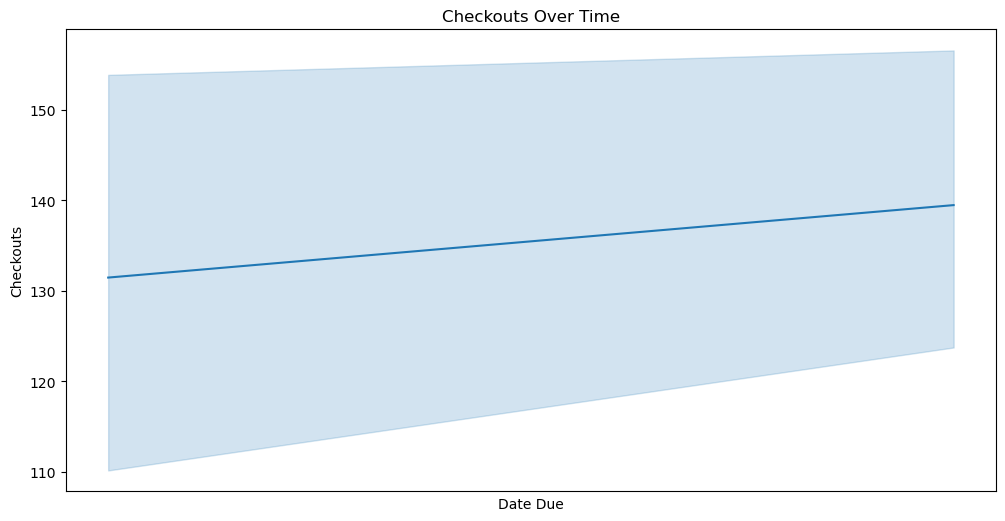

In [201]:
df['Date Due(Months)'] = pd.to_datetime(df['Date Due(Months)'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date Due(Months)', y='Checkouts', data=df)
plt.xlabel('Date Due')
plt.ylabel('Checkouts')
plt.title('Checkouts Over Time')
plt.xticks(rotation=45)
plt.show()


# 2. Regression Analysis:

In [202]:
import statsmodels.api as sm


X = df[['No of Copies']]
y = df['Checkouts']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              Checkouts   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     128.1
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           1.98e-19
Time:                        01:24:37   Log-Likelihood:                -515.30
No. Observations:                  99   AIC:                             1035.
Df Residuals:                      97   BIC:                             1040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.0843     10.614      2.552   

# Detect Outliers and Anomalies:

In [163]:
# Calculate the Interquartile Range (IQR) for the 'Checkouts' column
Q1 = df['Checkouts'].quantile(0.25)
Q3 = df['Checkouts'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'Checkouts' column
outliers = df[(df['Checkouts'] < lower_bound) | (df['Checkouts'] > upper_bound)]

# Display the outliers
print("Outliers:")
print(outliers)


Outliers:
                                                Title  \
0                    Advanced Engineering Mathematics   
1                        Engineering electromagnetics   
2                                    C how to program   
3                   Fundamentals of Electric Circuits   
4                Schaum's outlines programming with C   
5                        Engineering circuit analysis   
6                                         Verilog HDL   
7                          Engineering Thermodynamics   
8                                     Thomas Calculus   
94              Sapiens: A brief History of Humankind   
95                  Optimization for Machine Learning   
96                                         Steve Jobs   
97                                      Atomic Habits   
98  Ikigai: The Japanese secret to a long and happ...   

                       Author Notes  Checkouts       Call Number  \
0             Kreyszig, Erwin   MAT        412           517 KRE  

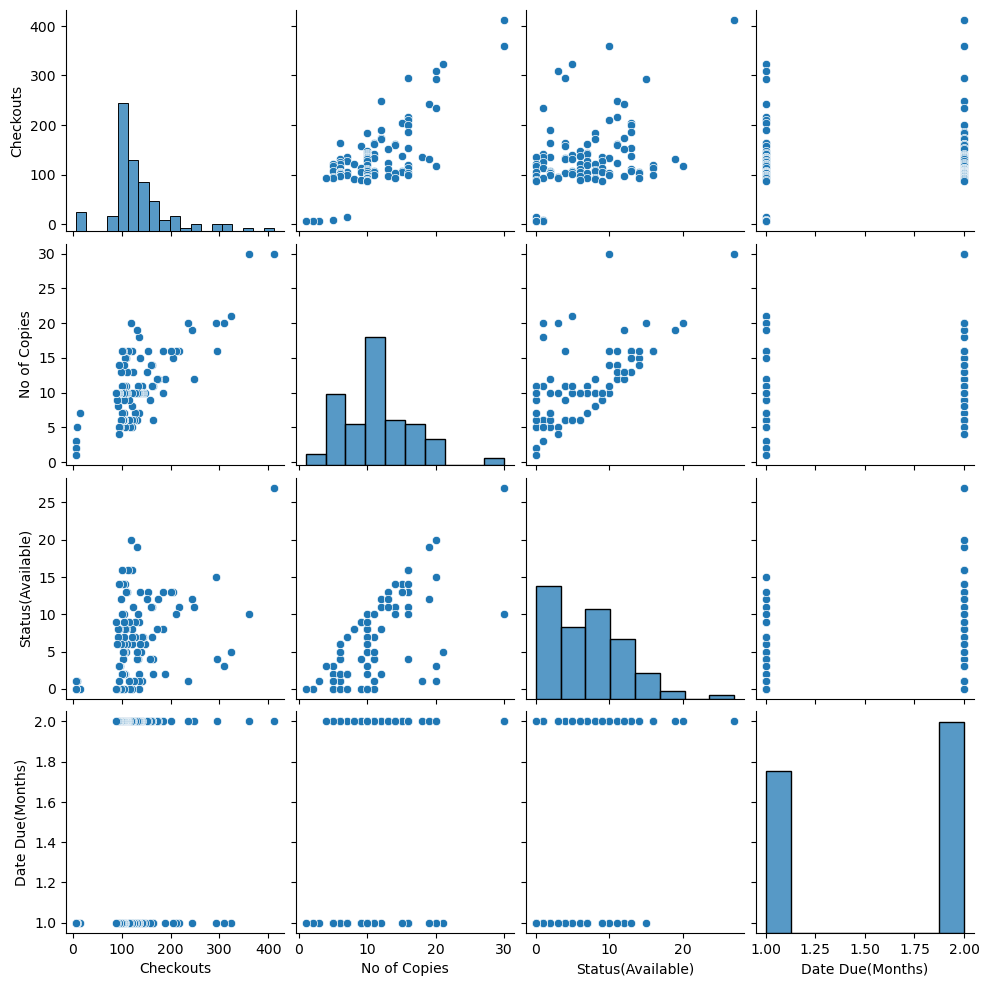

In [164]:
import seaborn as sns
sns.pairplot(df)


<Axes: xlabel='Status(Available)', ylabel='count'>

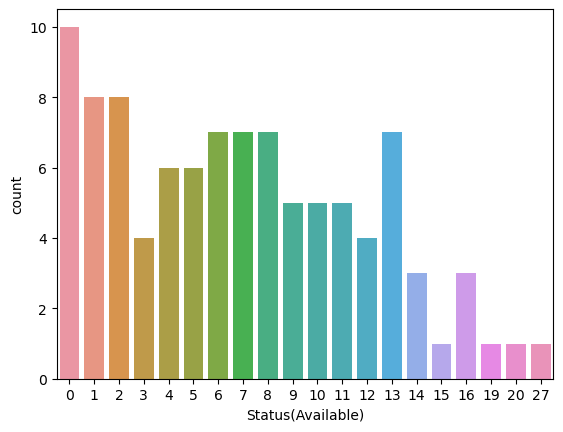

In [165]:
sns.countplot(x='Status(Available)', data=df)

